<a href="https://colab.research.google.com/github/ndeepak4149/HousePredictionML/blob/main/Trial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#define functions
def show_corr_heatmap(df, title):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask)
    plt.show()

def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
original_data = pd.read_csv(r"D:\Deepak\major project\train.csv")
original_data_for_cor=original_data.drop(['price'],axis=1)
original_data.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [ ]:
original_data_for_cor.corr()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
id,1.000000,-0.001377,0.003697,-0.013849,-0.011452,-0.011556,0.007562,0.012823,-0.000870,0.004804,0.004701,0.000605,0.001734,0.001661,0.010885,0.011835,0.001892
squareMeters,-0.001377,1.000000,0.056755,-0.006512,-0.001615,0.017832,0.019843,0.002738,-0.000150,0.014827,0.010350,0.017886,-0.018948,-0.008333,-0.063946,0.006013,-0.005814
numberOfRooms,0.003697,0.056755,1.000000,-0.000989,0.000197,0.044159,-0.008527,0.012343,0.021984,0.004819,-0.008951,0.011712,0.023536,0.027370,0.066873,-0.007623,-0.015969
hasYard,-0.013849,-0.006512,-0.000989,1.000000,-0.068559,-0.010663,0.002786,-0.002071,-0.002494,-0.008165,0.001580,0.005141,-0.011966,-0.003421,-0.001047,0.006715,-0.007774
hasPool,-0.011452,-0.001615,0.000197,-0.068559,1.000000,-0.000490,0.008218,-0.002603,0.000512,-0.007610,0.032965,0.014905,0.003251,-0.001070,0.007199,0.016283,-0.006831
floors,-0.011556,0.017832,0.044159,-0.010663,-0.000490,1.000000,0.005899,0.000913,0.009200,0.004584,-0.005746,-0.002473,0.007887,-0.006231,0.023794,-0.007920,-0.020811
cityCode,0.007562,0.019843,-0.008527,0.002786,0.008218,0.005899,1.000000,0.009425,-0.003807,0.008044,-0.000551,-0.003309,0.000686,0.017507,0.007452,0.006606,0.002911
cityPartRange,0.012823,0.002738,0.012343,-0.002071,-0.002603,0.000913,0.009425,1.000000,0.021518,0.005075,0.002154,-0.000393,0.000288,0.010329,-0.001874,0.003465,0.018328
numPrevOwners,-0.000870,-0.000150,0.021984,-0.002494,0.000512,0.009200,-0.003807,0.021518,1.000000,0.002074,-0.001010,-0.013071,-0.005544,0.001098,-0.004935,0.001031,0.013139
made,0.004804,0.014827,0.004819,-0.008165,-0.007610,0.004584,0.008044,0.005075,0.002074,1.000000,-0.002023,-0.001982,0.004274,0.010601,-0.006403,-0.008561,-0.009767


<function matplotlib.pyplot.show(close=None, block=None)>

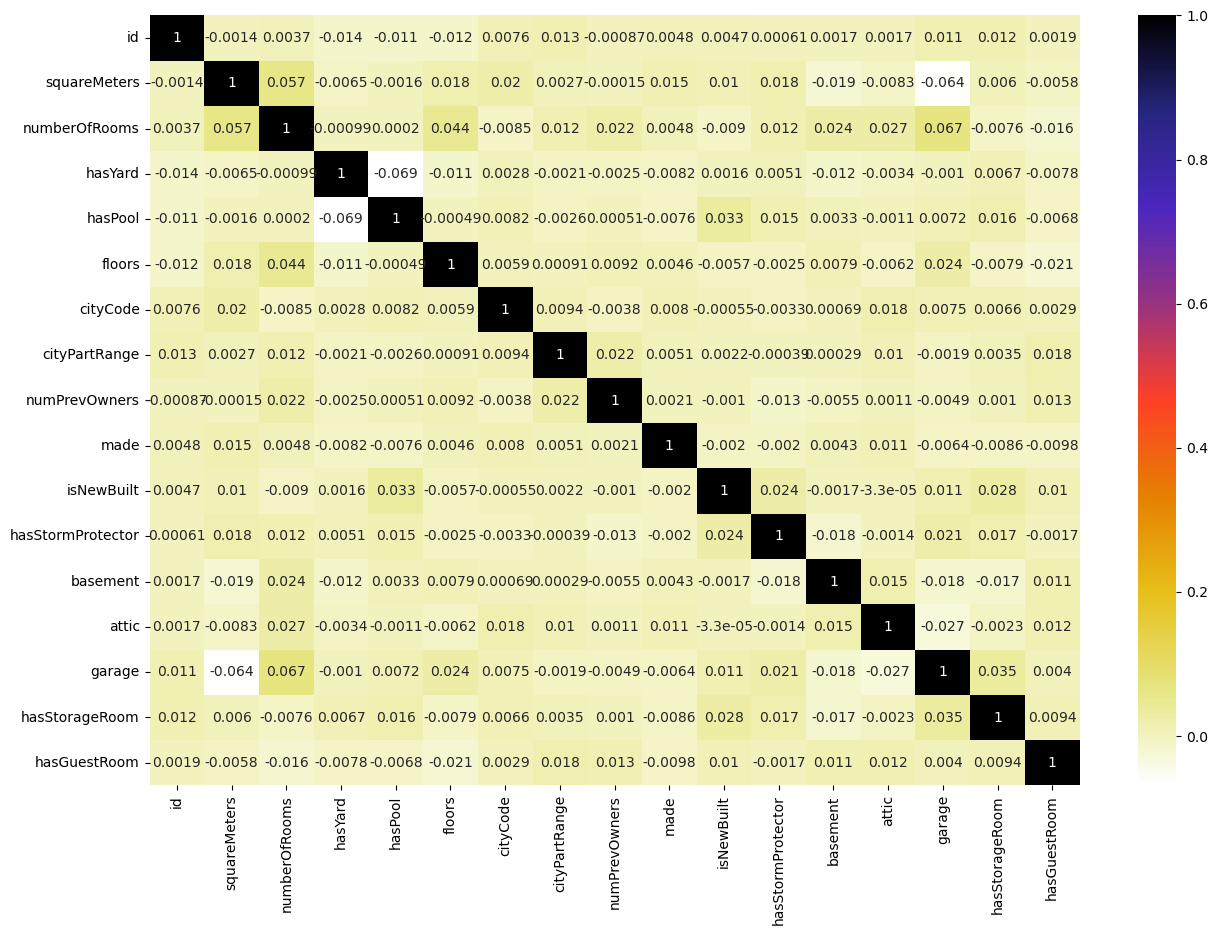

In [ ]:
#display(show_corr_heatmap(original_data, "correlation heatmap"))
plt.figure(figsize=(15,10))
cor=original_data_for_cor.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show

In [ ]:
corr_features=correlation(original_data_for_cor, 0.85)
len(set(corr_features))

0

In [ ]:
corr_features

set()

In [ ]:
original_data["ActualArea"] = original_data['squareMeters'] - original_data['basement'] - original_data['attic']-original_data['garage']
original_data['AreaPerHouse'] = original_data['squareMeters'] / original_data['numberOfRooms']
original_data['AreaPerRoom'] = original_data['ActualArea'] / original_data['numberOfRooms']
original_data['Extra'] = original_data['AreaPerHouse'] - original_data['AreaPerRoom']
original_data.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,...,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,ActualArea,AreaPerHouse,AreaPerRoom,Extra
0,0,34291,24,1,0,47,35693,2,1,2000,...,8,5196,369,0,3,3436795.2,28718,1428.791667,1196.583333,232.208333
1,1,95145,60,0,1,60,34773,1,4,2000,...,729,4496,277,0,6,9519958.0,89643,1585.750000,1494.050000,91.700000
2,2,92661,45,1,1,62,45457,4,8,2020,...,7473,8953,245,1,9,9276448.1,75990,2059.133333,1688.666667,370.466667
3,3,97184,99,0,0,59,15113,1,1,2000,...,6424,8522,256,1,9,9725732.2,81982,981.656566,828.101010,153.555556
4,4,61752,100,0,0,57,64245,8,4,2018,...,7151,2786,863,0,7,6181908.8,50952,617.520000,509.520000,108.000000


In [ ]:
original_data['squareMeters'].describe()

count    2.273000e+04
mean     4.658622e+04
std      4.952124e+04
min      8.900000e+01
25%      2.039275e+04
50%      4.448400e+04
75%      7.154700e+04
max      6.071330e+06
Name: squareMeters, dtype: float64

In [ ]:
def outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    O1 = Q1 - (1.5*IQR)
    O3 = Q3 + (1.5*IQR)
    df.loc[(df[var] <= O1), var] = O1
    df.loc[(df[var] >= O3), var] = O3
    return df[var]

In [ ]:
original_data['squareMeters'] = outliers(original_data, 'squareMeters')
original_data['squareMeters'].describe()


count     22730.000000
mean      46325.635300
std       29253.554766
min          89.000000
25%       20392.750000
50%       44484.000000
75%       71547.000000
max      148278.375000
Name: squareMeters, dtype: float64

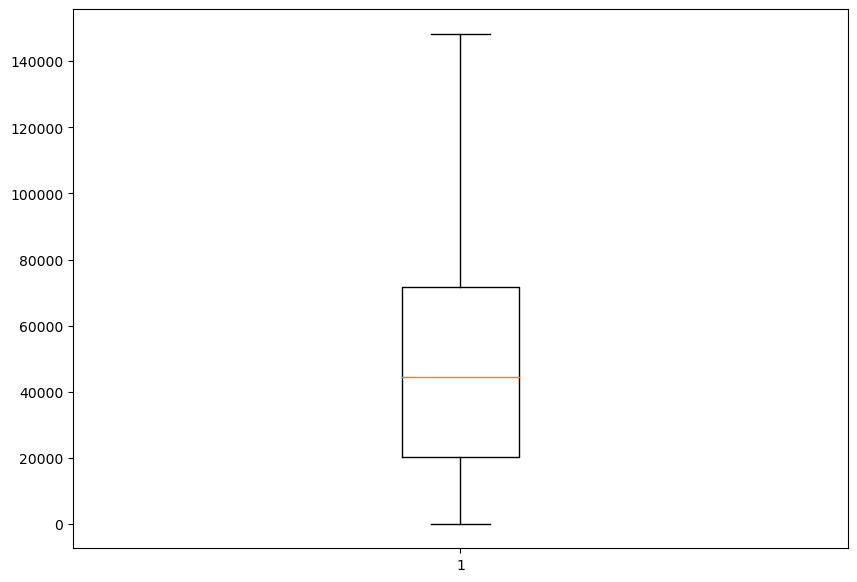

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(original_data.squareMeters)
plt.show()

In [ ]:
original_data['numberOfRooms'] = outliers(original_data, 'numberOfRooms')
original_data['numberOfRooms'].describe()

count    22730.000000
mean        48.241091
std         28.226428
min          1.000000
25%         25.000000
50%         47.000000
75%         75.000000
max        100.000000
Name: numberOfRooms, dtype: float64

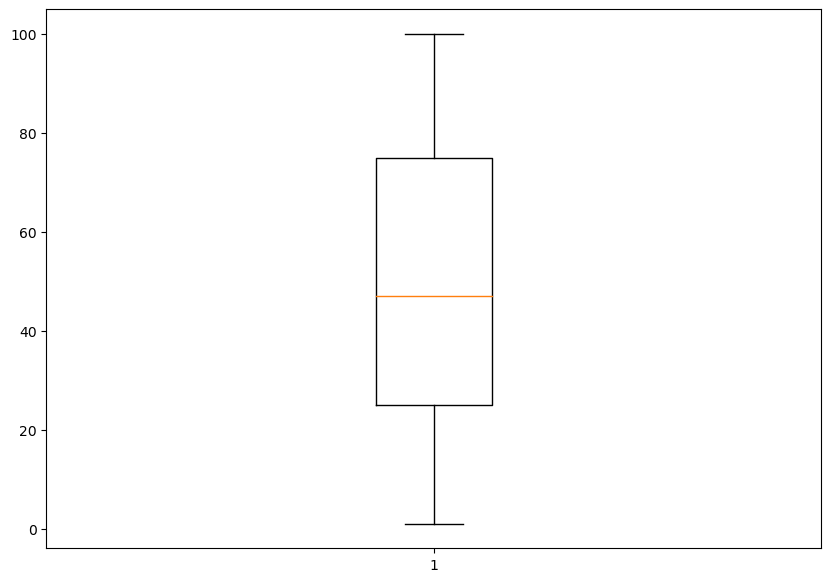

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(original_data.numberOfRooms)
plt.show()

In [ ]:
original_data['hasYard'].value_counts()

0    11913
1    10817
Name: hasYard, dtype: int64

In [ ]:
original_data['hasPool'].value_counts()

0    12439
1    10291
Name: hasPool, dtype: int64

In [ ]:
original_data['floors'] = outliers(original_data, 'floors')
original_data['floors'].describe()

count    22730.000000
mean        47.047954
std         26.905963
min          1.000000
25%         25.000000
50%         45.000000
75%         69.000000
max        135.000000
Name: floors, dtype: float64

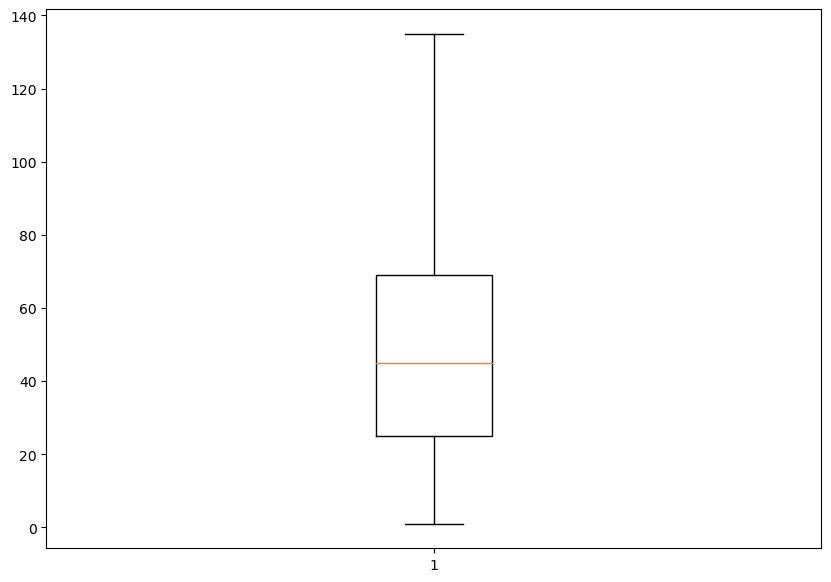

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(original_data.floors)
plt.show()

In [ ]:
original_data['cityCode'] = outliers(original_data, 'cityCode')
original_data['cityCode'].describe()

count     22730.000000
mean      49977.633744
std       29719.118134
min           3.000000
25%       22936.000000
50%       50414.000000
75%       76291.000000
max      156323.500000
Name: cityCode, dtype: float64

In [ ]:
original_data['cityCode'].value_counts()

1906.0     69
42634.0    35
42626.0    35
3545.0     32
426.0      31
           ..
91673.0     1
72462.0     1
41026.0     1
30045.0     1
50813.0     1
Name: cityCode, Length: 7806, dtype: int64

In [ ]:
original_data['numPrevOwners'].value_counts()

5     2868
8     2639
9     2458
7     2437
4     2376
6     2363
3     2065
2     1985
1     1790
10    1749
Name: numPrevOwners, dtype: int64

In [ ]:
original_data['made'].value_counts()

2000     3588
2003     1156
2014     1070
2015     1036
2007     1021
2008      981
2009      972
2019      956
2013      934
2018      927
2006      921
2004      915
2016      910
1996      822
2005      764
2017      741
1998      719
1993      651
1995      631
1994      628
2020      595
1997      592
1999      588
2010      152
2021      110
1990       77
2011       68
2001       59
1992       59
2012       51
1991       30
10000       5
2002        1
Name: made, dtype: int64

In [ ]:
original_data['HouseAge'] = 2023 - original_data['made']
original_data['HouseAge'].value_counts()

 23      3588
 20      1156
 9       1070
 8       1036
 16      1021
 15       981
 14       972
 4        956
 10       934
 5        927
 17       921
 19       915
 7        910
 27       822
 18       764
 6        741
 25       719
 30       651
 28       631
 29       628
 3        595
 26       592
 24       588
 13       152
 2        110
 33        77
 12        68
 22        59
 31        59
 11        51
 32        30
-7977       5
 21         1
Name: HouseAge, dtype: int64

In [ ]:
original_data['isNewBuilt'].value_counts()

0    12093
1    10637
Name: isNewBuilt, dtype: int64

In [ ]:
original_data['hasStormProtector'].value_counts()

0    12274
1    10456
Name: hasStormProtector, dtype: int64

In [ ]:
original_data['basement'] = outliers(original_data, 'basement')

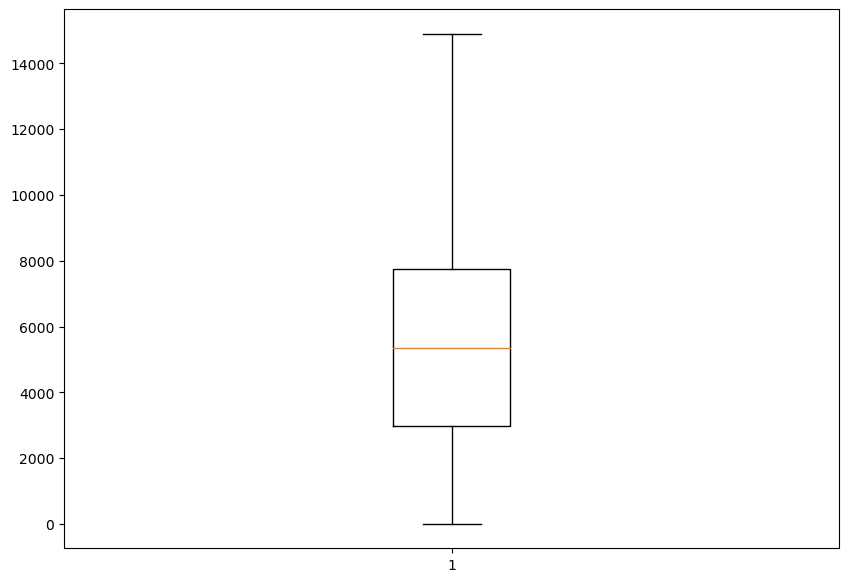

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(original_data.basement)
plt.show()

In [ ]:
original_data['attic'] = outliers(original_data, 'attic')

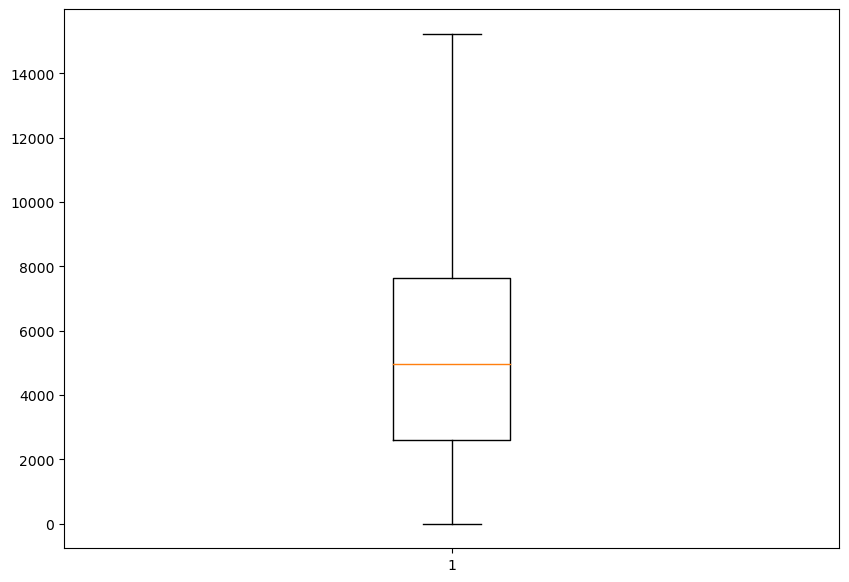

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(original_data.attic)
plt.show()

In [ ]:
original_data['hasStorageRoom'].value_counts()

0    12236
1    10494
Name: hasStorageRoom, dtype: int64

In [ ]:
original_data['hasGuestRoom'] = outliers(original_data, 'hasGuestRoom')
original_data['hasGuestRoom'].describe()

count    22730.000000
mean         5.153058
std          3.055246
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: hasGuestRoom, dtype: float64

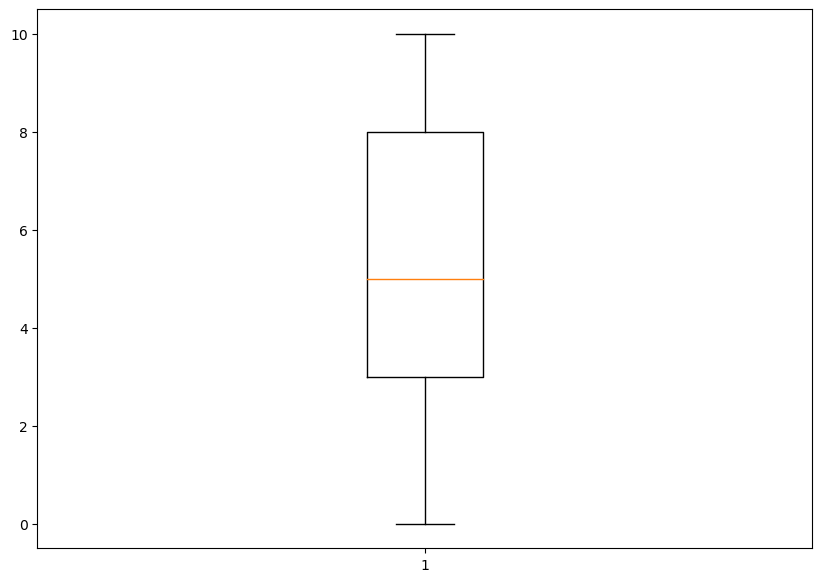

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(original_data.hasGuestRoom)
plt.show()

In [ ]:
original_data['ActualArea'] = outliers(original_data, 'ActualArea')

In [ ]:
original_data['AreaPerHouse'] = outliers(original_data, 'AreaPerHouse')

In [ ]:
original_data['AreaPerRoom'] = outliers(original_data, 'AreaPerRoom')

In [ ]:
original_data['Extra'] = outliers(original_data, 'Extra')

In [ ]:
original_data.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,...,attic,garage,hasStorageRoom,hasGuestRoom,price,ActualArea,AreaPerHouse,AreaPerRoom,Extra,HouseAge
0,0,34291.0,24,1,0,47,35693.0,2,1,2000,...,5196.0,369,0,3.0,3436795.2,28718.0,1428.791667,1196.583333,232.208333,23
1,1,95145.0,60,0,1,60,34773.0,1,4,2000,...,4496.0,277,0,6.0,9519958.0,89643.0,1585.750000,1494.050000,91.700000,23
2,2,92661.0,45,1,1,62,45457.0,4,8,2020,...,8953.0,245,1,9.0,9276448.1,75990.0,2059.133333,1688.666667,370.466667,3
3,3,97184.0,99,0,0,59,15113.0,1,1,2000,...,8522.0,256,1,9.0,9725732.2,81982.0,981.656566,828.101010,153.555556,23
4,4,61752.0,100,0,0,57,64245.0,8,4,2018,...,2786.0,863,0,7.0,6181908.8,50952.0,617.520000,509.520000,108.000000,5


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d = scaler.fit_transform(original_data)
scaled_df = pd.DataFrame(d, columns=original_data.columns)

In [ ]:
scaled_df

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,...,attic,garage,hasStorageRoom,hasGuestRoom,price,ActualArea,AreaPerHouse,AreaPerRoom,Extra,HouseAge
0,-1.731975,-0.411400,-0.858827,1.049439,-0.909570,-0.001782,-0.480665,-1.308661,-1.703215,-0.067369,...,0.049157,-0.587516,-0.926085,-0.704724,-0.409443,-0.226169,0.057182,0.191347,-0.383492,0.067369
1,-1.731822,1.668872,0.416601,-0.952890,1.099421,0.481393,-0.511622,-1.673695,-0.597415,-0.067369,...,-0.191901,-0.922263,-0.926085,0.277215,1.670200,1.822656,0.188155,0.464641,-0.919698,0.067369
2,-1.731670,1.583957,-0.114827,1.049439,1.099421,0.555727,-0.152115,-0.578594,0.876986,0.100947,...,1.342950,-1.038696,1.079815,1.259155,1.586952,1.363524,0.583167,0.643442,0.144128,-0.100947
3,-1.731517,1.738574,1.798316,-0.952890,-0.909570,0.444225,-1.173164,-1.673695,-1.703215,-0.067369,...,1.194527,-0.998672,1.079815,1.259155,1.740548,1.565027,-0.315926,-0.147191,-0.683646,0.067369
4,-1.731365,0.527345,1.833744,-0.952890,-0.909570,0.369891,0.480084,0.881541,-0.597415,0.084115,...,-0.780771,1.209929,-0.926085,0.604528,0.529025,0.521530,-0.619778,-0.439883,-0.857495,-0.084115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,1.731365,0.324732,1.266887,1.049439,-0.909570,0.853066,-1.276871,-0.943627,1.614187,-0.067369,...,-1.469508,-0.674841,-0.926085,-1.686663,0.328085,0.496813,-0.580506,-0.358758,-1.014867,0.067369
22726,1.731517,0.668117,1.408601,1.049439,-0.909570,0.072552,-0.901145,1.246575,1.245587,0.058868,...,-0.895101,0.816966,-0.926085,0.604528,0.670148,0.753500,-0.510463,-0.304033,-0.921849,-0.058868
22727,1.731670,1.602109,-0.221113,1.049439,-0.909570,-0.299121,-1.394373,1.611609,-0.228814,0.050452,...,-0.337913,0.940676,-0.926085,-1.686663,1.602358,1.590383,0.716447,0.901826,-0.319593,-0.050452
22728,1.731822,0.665621,1.337744,1.049439,-0.909570,1.559244,-0.901145,-1.308661,1.614187,-0.067369,...,-0.874784,-0.434697,-0.926085,-1.686663,0.666730,0.742235,-0.496646,-0.293566,-0.902135,0.067369


In [ ]:
#model-1: Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from time import time

In [ ]:
t0 = time()
X = scaled_df[['ActualArea','AreaPerRoom','Extra','HouseAge','hasYard','hasPool','floors','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom', 'hasGuestRoom']]
y = scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('run time: ',time() - t0)

run time:  0.01595783233642578


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.1464051714149713


In [ ]:
import sklearn.metrics as sm
print("r2 score:",(sm.r2_score(y_test,y_pred)))

r2 score: 0.9788065977971141


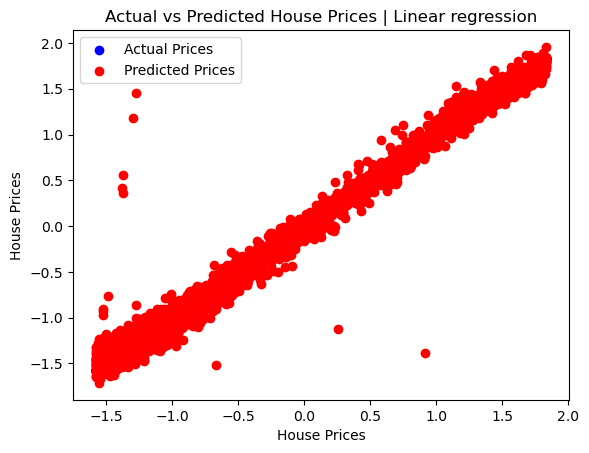

In [ ]:
plt.scatter(y_test, y_test, color='blue', label='Actual Prices')
plt.scatter(y_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Prices')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted House Prices | Linear regression')
plt.legend()
plt.show()


In [ ]:
#model-2:K-nearest neighbours
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
t0 = time()
X = scaled_df[['ActualArea','AreaPerRoom','Extra','HouseAge','hasYard','hasPool','floors','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom', 'hasGuestRoom']]
y = scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('run time: ',time() - t0)

run time:  1.6283628940582275


In [ ]:
print("r2 score:",(sm.r2_score(y_test,y_pred)))

r2 score: 0.8913775318370685


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.33175210891803497


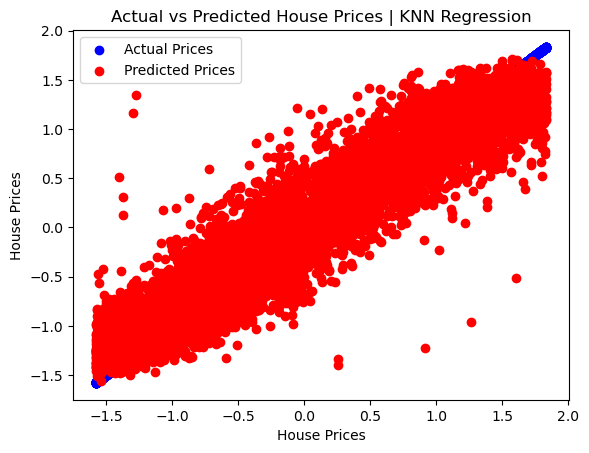

In [ ]:
plt.scatter(y_test, y_test, color='blue', label='Actual Prices')
plt.scatter(y_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Prices')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted House Prices | KNN Regression')
plt.legend()
plt.show()

In [ ]:
#model-3:Random forest regression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
t0 = time()
X = scaled_df[['ActualArea','AreaPerRoom','Extra','HouseAge','hasYard','hasPool','floors','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom', 'hasGuestRoom']]
y=scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)
print('run time: ',time() - t0)

run time:  6.806654453277588


In [ ]:
print("r2 score:",(sm.r2_score(y_test,y_pred)))

r2 score: 0.9941273704815792


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.07623369546411216


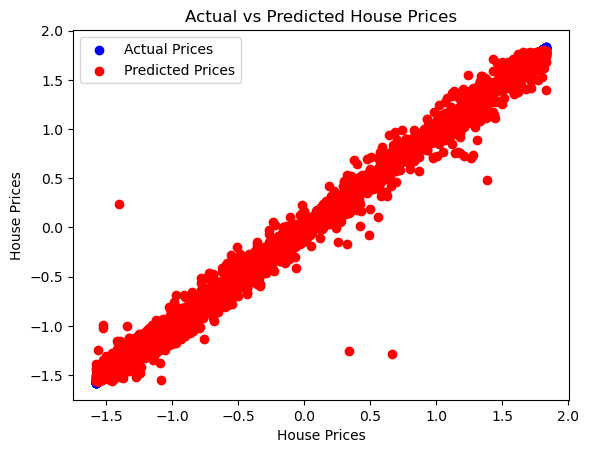

In [ ]:
plt.scatter(y_test, y_test, color='blue', label='Actual Prices')
plt.scatter(y_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Prices')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [ ]:
#model-4:polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
t0 = time()
X = original_data[['ActualArea','AreaPerRoom','Extra','HouseAge','hasYard','hasPool','floors','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom', 'hasGuestRoom']]
y= original_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
selected_model = LinearRegression()
selected_model.fit(X_poly, y)
y_pred = selected_model.predict(X_poly)
print('run time: ',time() - t0)

run time:  0.8641929626464844


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print('r2 score:', r2)

r2 score: 0.9874873806727597


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.1021091112612635


In [ ]:
#model-5:Multi layer perceprtron regression
from sklearn.neural_network import MLPRegressor

In [ ]:
t0 = time()
X = scaled_df[['ActualArea','AreaPerRoom','Extra','HouseAge','hasYard','hasPool','floors','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom', 'hasGuestRoom']]
y = scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = MLPRegressor(hidden_layer_sizes=(32, 16, 8), max_iter=1500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('run time: ',time() - t0)

run time:  3.0840210914611816


In [ ]:
score = model.score(X_test, y_test)
print(f'r2 score: {score}')

r2 score: 0.9886665845892826


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.10614381753809157


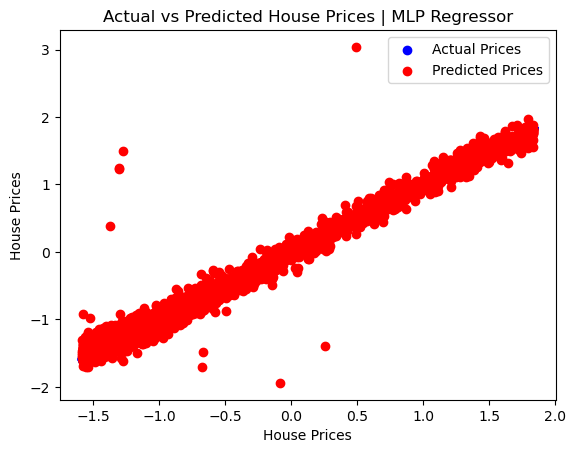

In [ ]:
plt.scatter(y_test, y_test, color='blue', label='Actual Prices')
plt.scatter(y_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Prices')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted House Prices | MLP Regressor')
plt.legend()
plt.show()

In [ ]:
#model-6: XG boost regression
import xgboost
from xgboost import XGBRegressor

In [ ]:
t0 = time()
X = scaled_df[['ActualArea','AreaPerRoom','Extra','HouseAge','hasYard','hasPool','floors','cityPartRange','numPrevOwners','isNewBuilt','hasStormProtector','hasStorageRoom', 'hasGuestRoom']]
y = scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
use_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
use_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('run time: ',time() - t0)



run time:  0.5306742191314697


In [ ]:
print("r2 score:",(sm.r2_score(y_test,y_pred)))

r2 score: 0.9900068441457847


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.1002095856911441


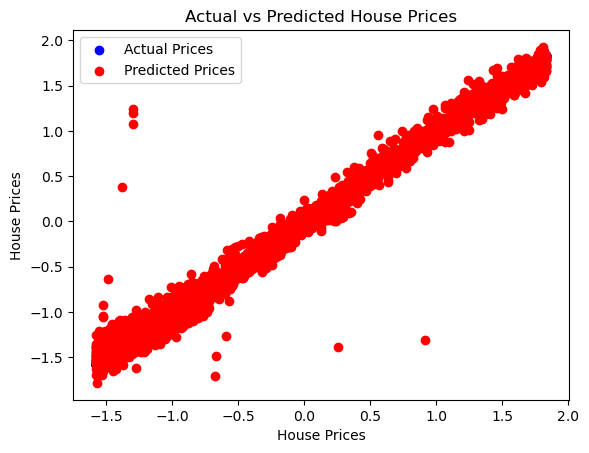

In [ ]:
plt.scatter(y_test, y_test, color='blue', label='Actual Prices')
plt.scatter(y_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Prices')
plt.ylabel('House Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [ ]:
import pickle
pickle.dump(use_model, open('use_model_lr.pkl', 'wb'))